In [1]:
import pandas as pd 
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU
import keras

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow 
from keras import datasets 

In [3]:
(X_train,Y_train),(X_test,Y_test)=datasets.fashion_mnist.load_data()

In [4]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
Y_train[:18]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0], dtype=uint8)

In [7]:
class_label=["t-shirt","trouser","pullower","dress","coat","sandal","shirt","sneaker","bag","ankle bag"] 
    
'''
0 => t-shirt
1 => trouser
2 => pullower
3 => dress
4 => coat
5 => sandal
6 => shirt
7 => sneaker
8 => bag
9 => ankle bag  '''


'\n0 => t-shirt\n1 => trouser\n2 => pullower\n3 => dress\n4 => coat\n5 => sandal\n6 => shirt\n7 => sneaker\n8 => bag\n9 => ankle bag  '

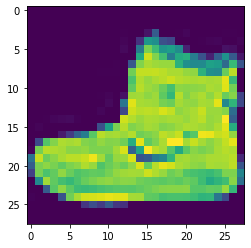

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train=X_train/255

In [10]:
X_test=X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#x_train=X_train.reshape(60000, 28, 28,1)

from keras.layers import MaxPooling2D
model=Sequential([keras.layers.Flatten(input_shape=[28,28])])


In [13]:
#model.add(flatten(input_shpe=[28,28]))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train,epochs=1)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5469 - accuracy: 0.8096


In [33]:
hist=model.fit(X_train,Y_train,epochs=7,validation_split=0.5)

Epoch 1/7
938/938 [==============================] - 12s 13ms/step - loss: 0.2351 - accuracy: 0.9117 - val_loss: 0.3744 - val_accuracy: 0.8770
Epoch 2/7
938/938 [==============================] - 9s 9ms/step - loss: 0.2305 - accuracy: 0.9142 - val_loss: 0.4028 - val_accuracy: 0.8699
Epoch 3/7
938/938 [==============================] - 6s 7ms/step - loss: 0.2301 - accuracy: 0.9154 - val_loss: 0.3861 - val_accuracy: 0.8707
Epoch 4/7
938/938 [==============================] - 5s 5ms/step - loss: 0.2276 - accuracy: 0.9134 - val_loss: 0.3960 - val_accuracy: 0.8700
Epoch 5/7
938/938 [==============================] - 4s 5ms/step - loss: 0.2263 - accuracy: 0.9156 - val_loss: 0.4064 - val_accuracy: 0.8690
Epoch 6/7
938/938 [==============================] - 5s 5ms/step - loss: 0.2227 - accuracy: 0.9182 - val_loss: 0.3773 - val_accuracy: 0.8783
Epoch 7/7
938/938 [==============================] - 4s 5ms/step - loss: 0.2190 - accuracy: 0.9182 - val_loss: 0.4135 - val_accuracy: 0.8690


In [28]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8624


[0.41841864585876465, 0.8623999953269958]

In [30]:
y_pred=model.predict(X_test)


In [20]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.93],
      dtype=float32)

In [31]:
np.argmax(y_pred[0].round(2))
print(hist.history['val_accuracy'])
print(hist.history['accuracy'])

[0.8706333041191101, 0.8733999729156494, 0.8736000061035156, 0.8731333613395691, 0.8747333288192749, 0.8730999827384949, 0.876466691493988, 0.8744999766349792, 0.8741999864578247, 0.8716333508491516, 0.870199978351593, 0.8755333423614502, 0.8759666681289673, 0.8749666810035706, 0.8745666742324829]
[0.8905333280563354, 0.8913999795913696, 0.8930333256721497, 0.8944666385650635, 0.8963333368301392, 0.8992000222206116, 0.901199996471405, 0.903166651725769, 0.9035000205039978, 0.9046666622161865, 0.9065333604812622, 0.9075999855995178, 0.9086333513259888, 0.9090666770935059, 0.9115666747093201]


<AxesSubplot:>

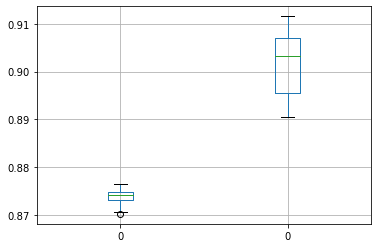

In [32]:
ta=pd.DataFrame(hist.history['val_accuracy'])
ba=pd.DataFrame(hist.history['accuracy'])
tva=pd.concat([ta,ba],axis=1)

tva.boxplot()

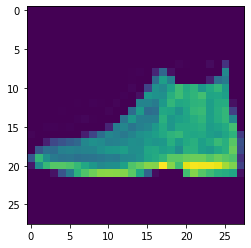

In [23]:
plt.imshow(X_test[0])

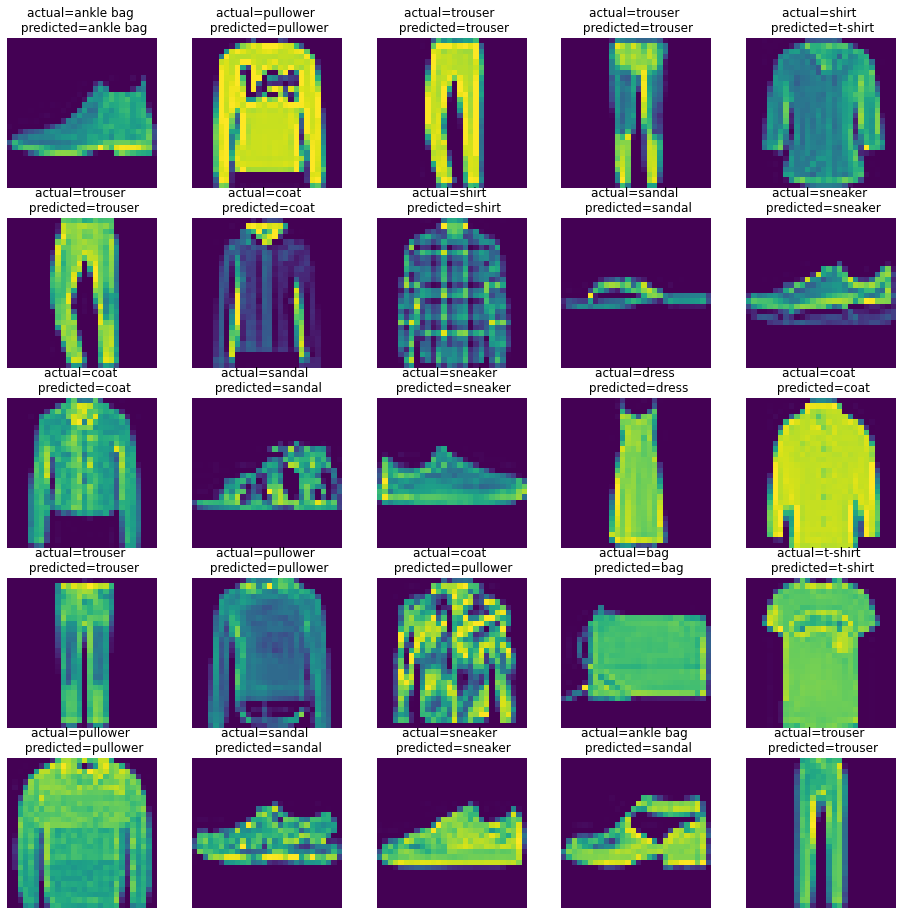

In [24]:
plt.figure(figsize=(16,16))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title("actual={} \n predicted={}".format(class_label[Y_test[i]],class_label[np.argmax(y_pred[i])]))

In [25]:
np.argmax(y_pred[0])

9

In [26]:
class_label[np.argmax(y_pred[0])]

'ankle bag'